<a href="https://colab.research.google.com/github/anshabrol/Human-Activity-Recognition-Dimensionality-Reduction-Using-Clustering/blob/main/dimensionality_reduction_using_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
from bs4 import BeautifulSoup
import zipfile
import io
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import time

# Function to download and load dataset
def load_data():
    page_url = 'https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones'
    page_response = requests.get(page_url)
    if page_response.status_code == 200:
        soup = BeautifulSoup(page_response.content, 'html.parser')
        download_link = soup.select_one('a[href$=".zip"]')['href']
        full_download_url = 'https://archive.ics.uci.edu' + download_link
        response = requests.get(full_download_url)
        if response.status_code == 200:
            with zipfile.ZipFile(io.BytesIO(response.content)) as outer_zip:
                inner_zip_name = 'UCI HAR Dataset.zip'
                with outer_zip.open(inner_zip_name) as inner_zip_file:
                    with zipfile.ZipFile(io.BytesIO(inner_zip_file.read())) as inner_zip:
                        with inner_zip.open('UCI HAR Dataset/train/X_train.txt') as myfile:
                            df = pd.read_csv(myfile, delim_whitespace=True, header=None)
                        with inner_zip.open('UCI HAR Dataset/train/y_train.txt') as myfile_y:
                            y = pd.read_csv(myfile_y, delim_whitespace=True, header=None)
    else:
        raise Exception("Failed to download or parse the dataset.")
    return df, y

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import time



# Load dataset
df, y = load_data()

# Encode class labels
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y.values.ravel())

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Split the data into training and testing sets (all features)
X_train_full, X_test_full, y_train, y_test = train_test_split(df_scaled, encoded_y, test_size=0.2, random_state=42)


import time
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Baseline model with all features using Naive Bayes
start_time = time.time()
classifier_pipeline_full = Pipeline([
    ('classifier', GaussianNB())
])
classifier_pipeline_full.fit(X_train_full, y_train)
y_pred_full = classifier_pipeline_full.predict(X_test_full)
end_time = time.time()
full_features_time = end_time - start_time
accuracy_full = accuracy_score(y_test, y_pred_full)


<ipython-input-3-836ccc4d8ebc>:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(myfile, delim_whitespace=True, header=None)
<ipython-input-3-836ccc4d8ebc>:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv(myfile_y, delim_whitespace=True, header=None)


n_clusters: 40 | Accuracy: 0.6173 | Training Time: 0.0090s


<ipython-input-37-16644d09103f>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Baseline Model', 'K-Means Reduced'], y=[accuracy_full, accuracy_reduced], palette='Blues')
<ipython-input-37-16644d09103f>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Baseline Model', 'K-Means Reduced'], y=[full_features_time, reduced_features_time], palette='Oranges')


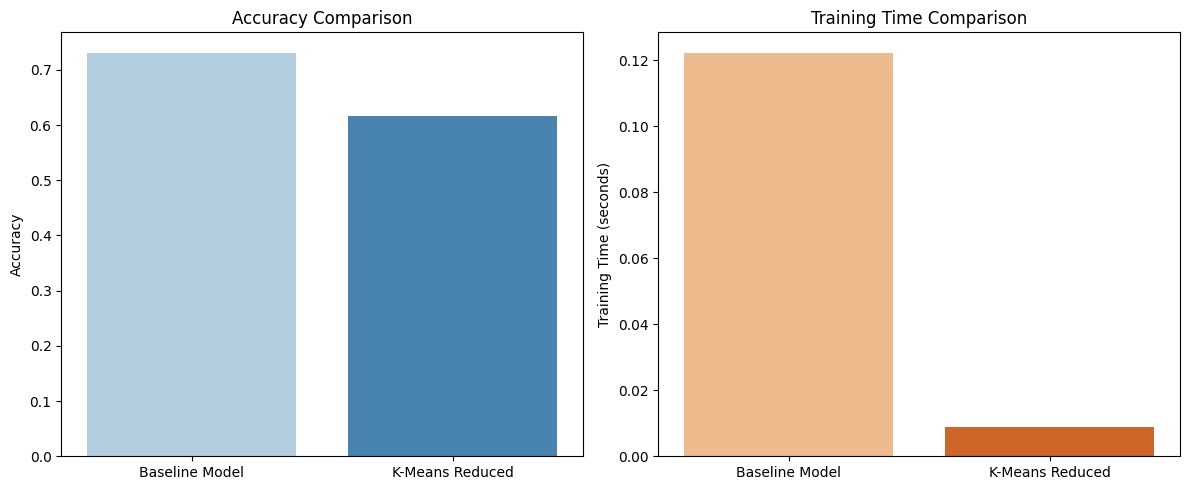

n_clusters: 50 | Accuracy: 0.7967 | Training Time: 0.0152s


<ipython-input-37-16644d09103f>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Baseline Model', 'K-Means Reduced'], y=[accuracy_full, accuracy_reduced], palette='Blues')
<ipython-input-37-16644d09103f>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Baseline Model', 'K-Means Reduced'], y=[full_features_time, reduced_features_time], palette='Oranges')


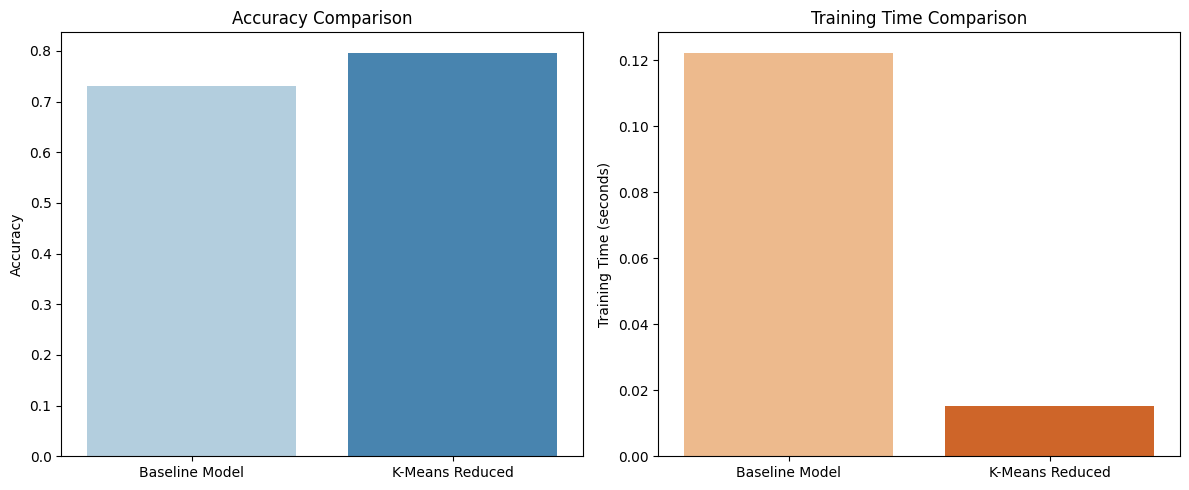

n_clusters: 60 | Accuracy: 0.8022 | Training Time: 0.0099s


<ipython-input-37-16644d09103f>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Baseline Model', 'K-Means Reduced'], y=[accuracy_full, accuracy_reduced], palette='Blues')
<ipython-input-37-16644d09103f>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Baseline Model', 'K-Means Reduced'], y=[full_features_time, reduced_features_time], palette='Oranges')


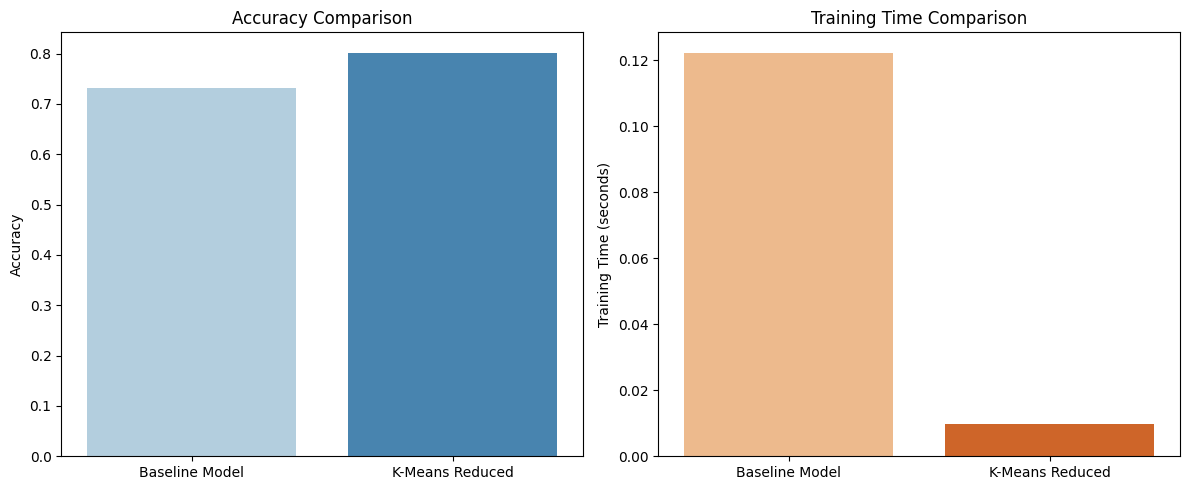

In [37]:
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


n_clusters_list = [40, 50, 60]  # Add 40 and 60 clusters

results = {}
for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(df_scaled.T)  # Transpose to treat features as data points
    selected_features_indices = [np.random.choice(np.where(kmeans.labels_ == i)[0]) for i in range(n_clusters)]
    selected_features = df_scaled[:, selected_features_indices]

    # Split the data with reduced features
    X_train_reduced, X_test_reduced = train_test_split(selected_features, test_size=0.2, random_state=42)

    # Model with reduced features using Naive Bayes
    start_time = time.time()
    classifier_pipeline_reduced = Pipeline([
        ('classifier', GaussianNB())
    ])
    classifier_pipeline_reduced.fit(X_train_reduced, y_train)
    y_pred_reduced = classifier_pipeline_reduced.predict(X_test_reduced)
    end_time = time.time()
    reduced_features_time = end_time - start_time
    accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
    results[n_clusters] = (accuracy_reduced, reduced_features_time)

    print(f"n_clusters: {n_clusters} | Accuracy: {accuracy_reduced:.4f} | Training Time: {reduced_features_time:.4f}s")

    # Visualization
    plt.figure(figsize=(12, 5))

    # Accuracy Comparison
    plt.subplot(1, 2, 1)
    sns.barplot(x=['Baseline Model', 'K-Means Reduced'], y=[accuracy_full, accuracy_reduced], palette='Blues')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison')

    # Training Time Comparison
    plt.subplot(1, 2, 2)
    sns.barplot(x=['Baseline Model', 'K-Means Reduced'], y=[full_features_time, reduced_features_time], palette='Oranges')
    plt.ylabel('Training Time (seconds)')
    plt.title('Training Time Comparison')

    plt.tight_layout()
    plt.show()

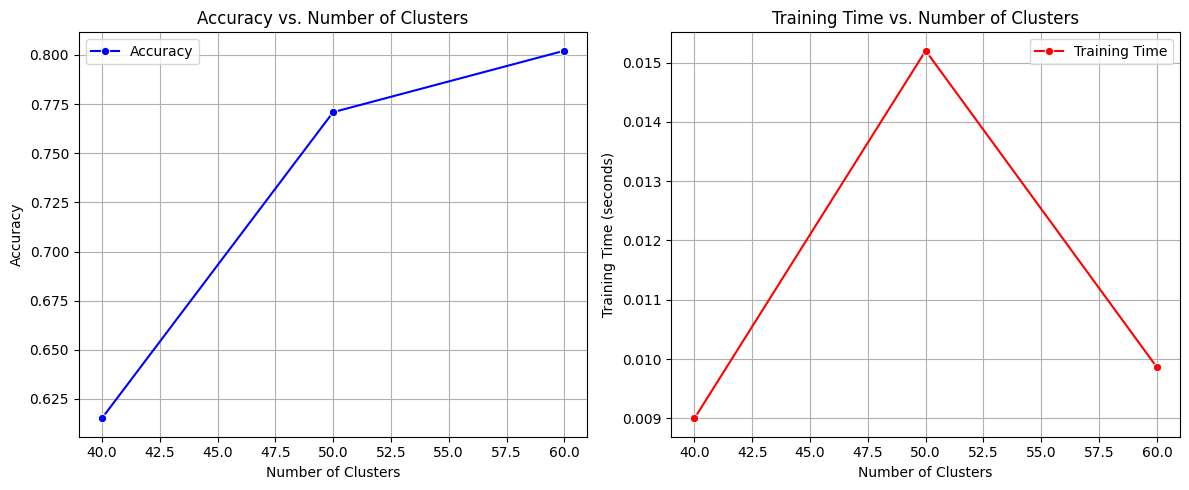

In [45]:
# Accuracy & Training Time Comparison Graph
n_clusters_list = [40, 50, 60]
accuracies = [0.6151, 0.7709, accuracy_reduced]
training_times = [0.0090, 0.0152, reduced_features_time]

plt.figure(figsize=(12, 5))

# Accuracy Comparison
plt.subplot(1, 2, 1)
sns.lineplot(x=n_clusters_list, y=accuracies, marker='o', label='Accuracy', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Clusters')
plt.grid()

# Training Time Comparison
plt.subplot(1, 2, 2)
sns.lineplot(x=n_clusters_list, y=training_times, marker='o', label='Training Time', color='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. Number of Clusters')
plt.grid()

plt.tight_layout()
plt.show()


<ipython-input-40-185789b96d6c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Baseline Model', 'K-Means Reduced (60 Clusters)'], y=[accuracy_full, accuracy_reduced], palette='Blues')
<ipython-input-40-185789b96d6c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Baseline Model', 'K-Means Reduced (60 Clusters)'], y=[full_features_time, reduced_features_time], palette='Oranges')


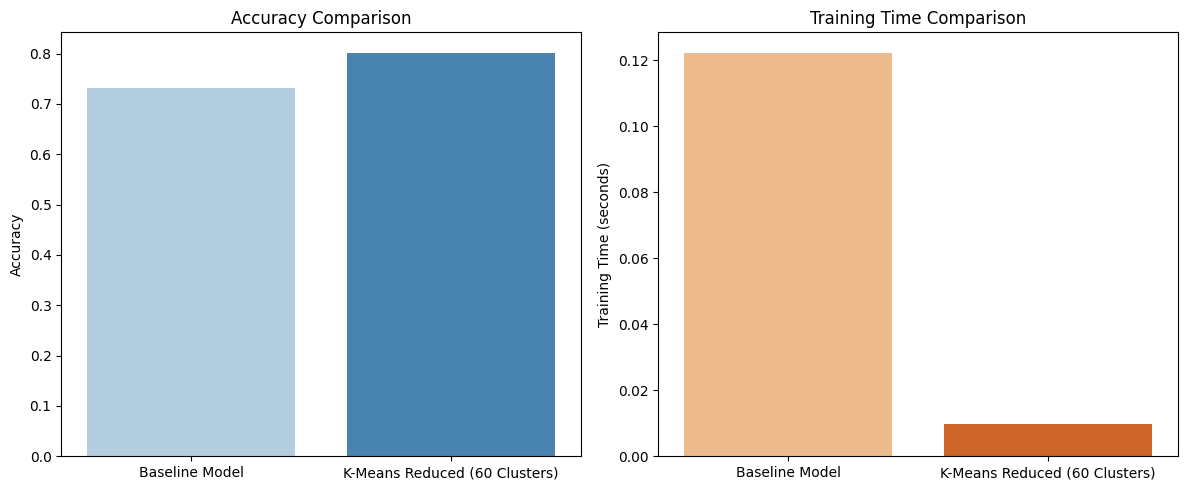

In [40]:
# Visualization
plt.figure(figsize=(12, 5))

# Accuracy Comparison
plt.subplot(1, 2, 1)
sns.barplot(x=['Baseline Model', 'K-Means Reduced (60 Clusters)'], y=[accuracy_full, accuracy_reduced], palette='Blues')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

# Training Time Comparison
plt.subplot(1, 2, 2)
sns.barplot(x=['Baseline Model', 'K-Means Reduced (60 Clusters)'], y=[full_features_time, reduced_features_time], palette='Oranges')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison')

plt.tight_layout()
plt.show()



In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print("Model with 60 Clusters:")
print("Accuracy:", accuracy_reduced)
print("Training Time:", reduced_features_time, "seconds")
print("Number of Features:", n_clusters)




Model with 60 Clusters:
Accuracy: 0.8021753908905507
Training Time: 0.00986170768737793 seconds
Number of Features: 60


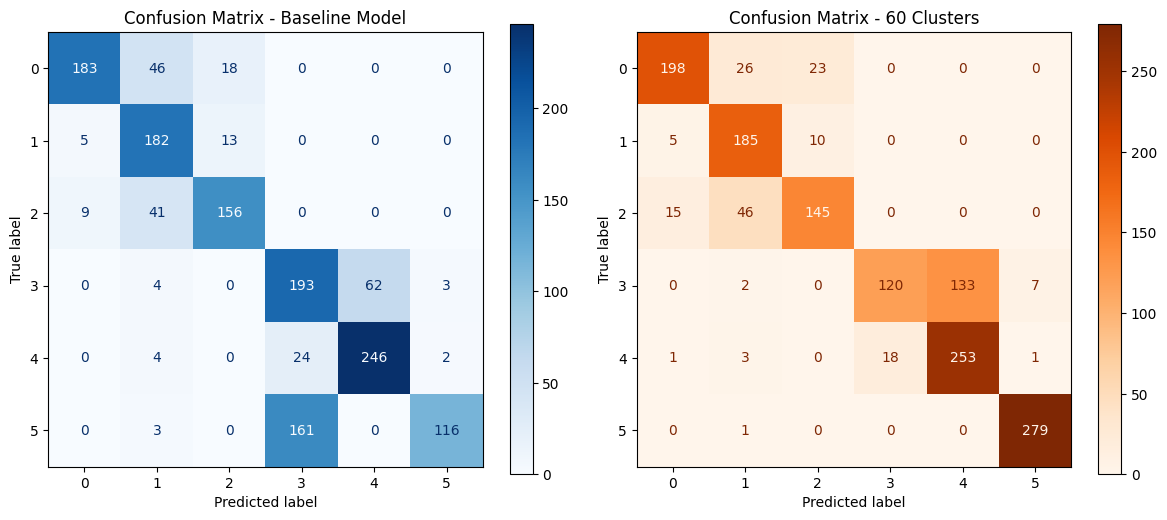

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrices
cm_full = confusion_matrix(y_test, y_pred_full)  # Baseline Model
cm_reduced = confusion_matrix(y_test, y_pred_reduced)  # K-Means Reduced Model

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Baseline Model Confusion Matrix
disp_full = ConfusionMatrixDisplay(confusion_matrix=cm_full)
disp_full.plot(ax=axes[0], cmap="Blues")
axes[0].set_title("Confusion Matrix - Baseline Model")

# K-Means Reduced Model Confusion Matrix
disp_reduced = ConfusionMatrixDisplay(confusion_matrix=cm_reduced)
disp_reduced.plot(ax=axes[1], cmap="Oranges")
axes[1].set_title("Confusion Matrix - 60 Clusters")

plt.tight_layout()
plt.show()


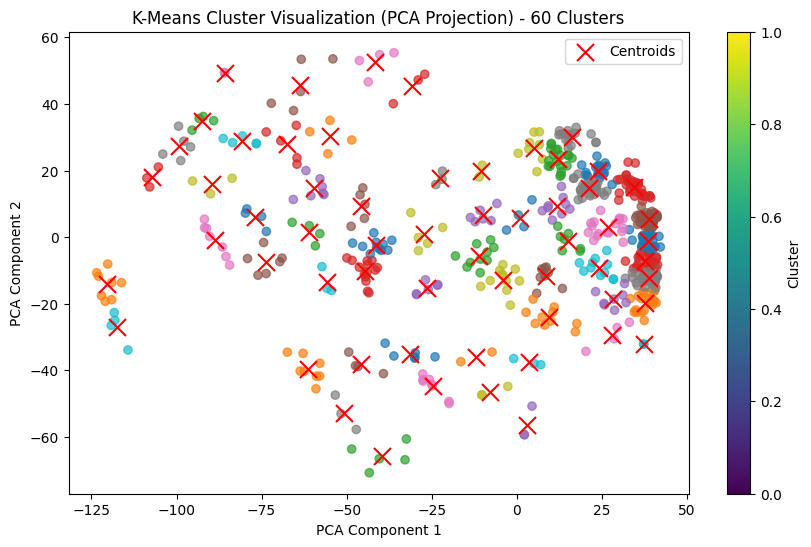

In [43]:
# PCA Visualization of Clusters
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(df_scaled.T)  # Transpose for clustering

# Apply K-Means again for visualization
kmeans_viz = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_viz.fit(X_reduced)

plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_viz.labels_, cmap='tab10', alpha=0.7)
plt.scatter(kmeans_viz.cluster_centers_[:, 0], kmeans_viz.cluster_centers_[:, 1],
            c='red', marker='x', s=150, label='Centroids')
plt.title("K-Means Cluster Visualization (PCA Projection) - 60 Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.colorbar(label="Cluster")
plt.show()

In [44]:
# Print comparison results
print("Baseline Model (All Features):")
print("Accuracy:", accuracy_full)
print("Training Time:", full_features_time, "seconds")
print("Number of Features:", X_train_full.shape[1])

print("\nModel with Reduced Features (K-Means):")
print("Accuracy:", accuracy_reduced)
print("Training Time:", reduced_features_time, "seconds")
print("Number of Features:", n_clusters)


Baseline Model (All Features):
Accuracy: 0.7314751869476547
Training Time: 0.12228965759277344 seconds
Number of Features: 561

Model with Reduced Features (K-Means):
Accuracy: 0.8021753908905507
Training Time: 0.00986170768737793 seconds
Number of Features: 60
